In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

# Data Preprocessing

In [42]:
data = pd.read_csv('IPL Player Stats - 2016 till 2019.csv')
ipl = pd.read_csv('0y clean data pre ipl.csv')

In [78]:
ipl2 = pd.read_csv('ipl.csv')

In [79]:
ipl2

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129


In [43]:
data.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [80]:
ipl

,Unnamed: 0,match_id,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wicket_type,player_dismissed,run,wickets,truns,y
0,0,335982,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0.0,1.0,,,1.0,0.0,1.0,68.0
1,1,335982,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,1.0,68.0
2,2,335982,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,,,1.0,0.0,2.0,68.0
3,3,335982,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
4,4,335982,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,,,0.0,0.0,2.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32173,32173,1178420,Sawai Mansingh Stadium,1,6.2,Sunrisers Hyderabad,Rajasthan Royals,DA Warner,MK Pandey,R Parag,1.0,0.0,,,1.0,1.0,53.0,57.0
32174,32174,1178420,Sawai Mansingh Stadium,1,6.3,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,DA Warner,R Parag,1.0,0.0,,,1.0,1.0,54.0,57.0
32175,32175,1178420,Sawai Mansingh Stadium,1,6.4,Sunrisers Hyderabad,Rajasthan Royals,DA Warner,MK Pandey,R Parag,1.0,0.0,,,1.0,1.0,55.0,57.0
32176,32176,1178420,Sawai Mansingh Stadium,1,6.5,Sunrisers Hyderabad,Rajasthan Royals,MK Pandey,DA Warner,R Parag,1.0,0.0,,,1.0,1.0,56.0,57.0


In [75]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32178 entries, 0 to 32177
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32178 non-null  int64  
 1   match_id          32178 non-null  int64  
 2   venue             32178 non-null  object 
 3   innings           32178 non-null  int64  
 4   ball              32178 non-null  float64
 5   batting_team      32178 non-null  object 
 6   bowling_team      32178 non-null  object 
 7   striker           32178 non-null  object 
 8   non_striker       32178 non-null  object 
 9   bowler            32178 non-null  object 
 10  runs_off_bat      32178 non-null  float64
 11  extras            32178 non-null  float64
 12  wicket_type       32178 non-null  object 
 13  player_dismissed  32178 non-null  object 
 14  run               32178 non-null  float64
 15  wickets           32178 non-null  float64
 16  truns             32178 non-null  float6

In [81]:
ipl2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76014 entries, 0 to 76013
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mid             76014 non-null  int64  
 1   date            76014 non-null  object 
 2   venue           76014 non-null  object 
 3   bat_team        76014 non-null  object 
 4   bowl_team       76014 non-null  object 
 5   batsman         76014 non-null  object 
 6   bowler          76014 non-null  object 
 7   runs            76014 non-null  int64  
 8   wickets         76014 non-null  int64  
 9   overs           76014 non-null  float64
 10  runs_last_5     76014 non-null  int64  
 11  wickets_last_5  76014 non-null  int64  
 12  striker         76014 non-null  int64  
 13  non-striker     76014 non-null  int64  
 14  total           76014 non-null  int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 8.7+ MB


In [46]:
data['Player'].unique().shape

(268,)

In [47]:
ipl['striker'].unique().shape

(235,)

In [48]:
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)

In [49]:
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [50]:
new_ipl.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'run', 'wickets',
       'truns', 'y', 'Team', 'Player', 'Tournament', 'Matches',
       'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score',
       'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50',
       '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled',
       'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures',
       'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate',
       '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken',
       'Stumpings Made'],
      dtype='object')

In [51]:
new_ipl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75408 entries, 0 to 75407
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   venue                 75408 non-null  object 
 1   innings               75408 non-null  int64  
 2   ball                  75408 non-null  float64
 3   batting_team          75408 non-null  object 
 4   bowling_team          75408 non-null  object 
 5   striker               75408 non-null  object 
 6   non_striker           75408 non-null  object 
 7   bowler                75408 non-null  object 
 8   runs_off_bat          75408 non-null  float64
 9   extras                75408 non-null  float64
 10  run                   75408 non-null  float64
 11  wickets               75408 non-null  float64
 12  truns                 75408 non-null  float64
 13  y                     75408 non-null  float64
 14  Team                  75408 non-null  object 
 15  Player             

In [52]:
#label encoding
dataset = pd.DataFrame(new_ipl)
for feature in dataset:
    if dataset[feature].dtype==object:
        le = preprocessing.LabelEncoder()
        fs = dataset[feature].unique()
        le.fit(fs)
        dataset[feature] = le.transform(dataset[feature])

dataset

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,8,0
3,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,8,1,6.2,13,7,4,193,20,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75404,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75405,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75406,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Feature enginneering.
X = new_ipl.drop('y',axis=1).values
y = new_ipl['y'].values

In [54]:
#creating train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
# Scaling the data using MinMaxScaler which is important when we deal with neural nets
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #test data is predicted so should not be scaled

In [56]:
X_train.shape

(50523, 42)

# Model Generation and Training

In [67]:
model = Sequential([
    Dense(43, activation='relu'),
    Dropout(0.5),
    
    Dense(22, activation='relu'),
    Dropout(0.5),
    
    Dense(11, activation='relu'),
    Dropout(0.5),
    
    Dense(1)
])

model.compile(optimizer='adam', loss='mse') #mse loss due to regression task

In [68]:
# Early stopping is done to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
1579/1579 [==============================] - 6s 3ms/step - loss: 869.2072 - val_loss: 224.5407
Epoch 2/400
1579/1579 [==============================] - 4s 3ms/step - loss: 585.4295 - val_loss: 203.0185
Epoch 3/400
1579/1579 [==============================] - 4s 3ms/step - loss: 519.9101 - val_loss: 188.2931
Epoch 4/400
1579/1579 [==============================] - 6s 4ms/step - loss: 477.9783 - val_loss: 133.5869
Epoch 5/400
1579/1579 [==============================] - 5s 3ms/step - loss: 448.1025 - val_loss: 129.9992
Epoch 6/400
1579/1579 [==============================] - 5s 3ms/step - loss: 417.5345 - val_loss: 120.2834
Epoch 7/400
1579/1579 [==============================] - 5s 3ms/step - loss: 391.3216 - val_loss: 128.2587
Epoch 8/400
1579/1579 [==============================] - 5s 3ms/step - loss: 362.8471 - val_loss: 153.3039
Epoch 9/400
1579/1579 [==============================] - 5s 3ms/step - loss: 344.6870 - val_loss: 116.0275
Epoch 10/400
1579/1579 [=============

<AxesSubplot: >

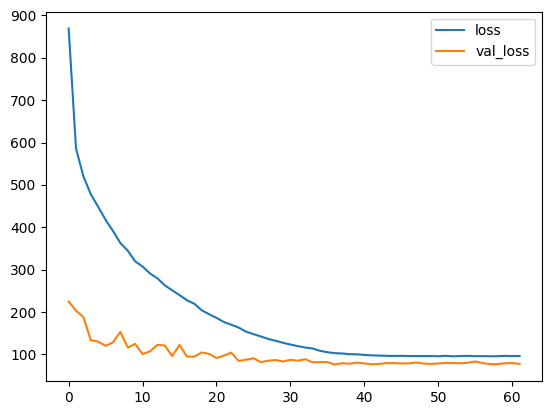

In [69]:
# visualizing loss functions
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

# Testing the model

In [70]:
predictions = model.predict(X_test)

778/778 [==============================] - 1s 1ms/step


In [71]:
mean_absolute_error(y_test,predictions), np.sqrt(mean_squared_error(y_test,predictions))

(6.657681926369356, 8.80750735645462)

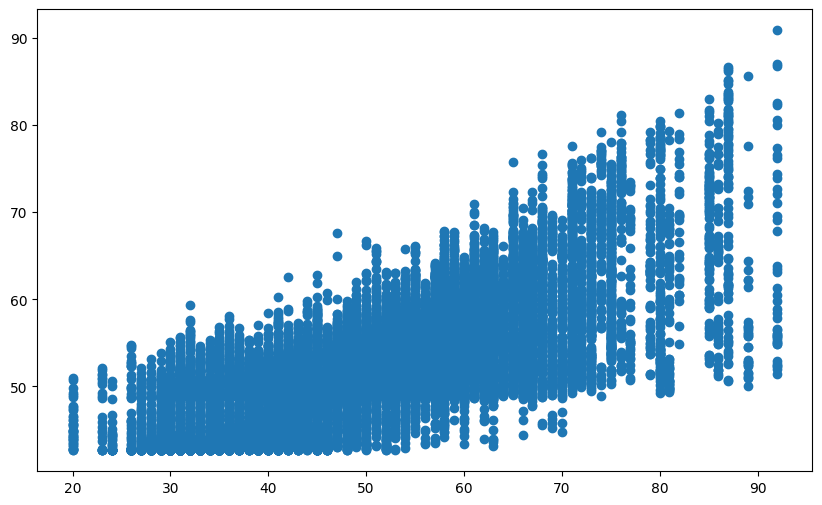

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

In [73]:
out = pd.DataFrame(predictions,columns=['Predict'])
out['Actual']=y_test

In [74]:
out.head(10)

,Predict,Actual
0,49.013378,49.0
1,44.736401,47.0
2,44.412643,37.0
3,61.825211,63.0
4,52.409637,57.0
5,56.887718,59.0
6,48.883308,37.0
7,46.741749,47.0
8,51.559444,45.0
9,51.843102,56.0
